In [1]:
! pip install pandas

  Using cached pandas-1.3.5-cp39-cp39-macosx_10_9_x86_64.whl (11.3 MB)
  Using cached pytz-2021.3-py2.py3-none-any.whl (503 kB)
You should consider upgrading via the '/Users/jakubsmekal/Development/Neuro/neuro/bin/python3 -m pip install --upgrade pip' command.


In [2]:
from models.transformer import TransformerModel

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
data_path = './kt4subset/students/u265925.csv'

In [8]:
data = pd.read_csv(data_path)

In [9]:
data.head()

,timestamp,action_type,item_id,cursor_time,source,user_answer,platform
0,1537793156353,enter,b5136,NaN,diagnosis,NaN,web
1,1537793163340,respond,q6730,NaN,diagnosis,a,web
2,1537793164960,submit,b5136,NaN,diagnosis,NaN,web
3,1537793166415,enter,b206,NaN,diagnosis,NaN,web
4,1537793182712,respond,q206,NaN,diagnosis,c,web


In [10]:
!pip install transformers

     |████████████████████████████████| 3.4 MB 808 kB/s eta 0:00:01     |████████████▉                   | 1.3 MB 1.6 MB/s eta 0:00:02
     |████████████████████████████████| 895 kB 2.2 MB/s eta 0:00:01
  Using cached tokenizers-0.10.3-cp39-cp39-macosx_10_11_x86_64.whl (2.2 MB)
  Using cached regex-2021.11.10-cp39-cp39-macosx_10_9_x86_64.whl (288 kB)
  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
  Using cached click-8.0.3-py3-none-any.whl (97 kB)


In [11]:
timestamps = data['timestamp']
timestamps

0     1537793156353
1     1537793163340
2     1537793164960
3     1537793166415
4     1537793182712
5     1537793183708
6     1537793185094
7     1537793203644
8     1537793204396
9     1537793205798
10    1537793238005
11    1537793238689
12    1537793252315
13    1537793264004
14    1537793265788
15    1537793292918
16    1537793297828
17    1537793301116
18    1537793302501
19    1537793325709
20    1537793328267
21    1537793330003
22    1537793331541
23    1537793361491
24    1537793362525
25    1537793400655
26    1537793406620
27    1537793407602
Name: timestamp, dtype: int64

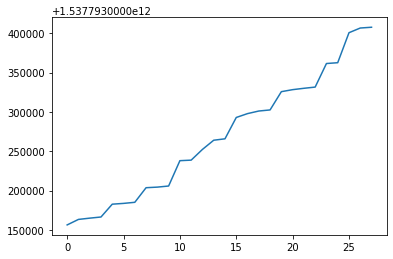

In [12]:
plt.plot(timestamps)

In [13]:
questions = pd.read_csv('./kt4subset/questions.csv')
questions.head()

,question_id,bundle_id,explanation_id,correct_answer,part,tags,deployed_at
0,q1,b1,e1,b,1,1;2;179;181,1558093217098
1,q2,b2,e2,a,1,15;2;182,1558093219720
2,q3,b3,e3,b,1,14;2;179;183,1558093222784
3,q4,b4,e4,b,1,9;2;179;184,1558093225357
4,q5,b5,e5,c,1,8;2;179;181,1558093228439


In [14]:
q_timestamps = questions['deployed_at']
q_timestamps.head()

0    1558093217098
1    1558093219720
2    1558093222784
3    1558093225357
4    1558093228439
Name: deployed_at, dtype: int64

In [9]:
subset_question_timestamps = pd.DataFrame()

In [10]:
for ts in timestamps:
    if ts in q_timestamps:
        subset_question_timestamps.add(ts)

In [11]:
subset_question_timestamps

""


In [15]:
def getStudentAnswers(s_data):
    classes = ['action_type', 'item_id', 'user_answer']
    user_answers = pd.DataFrame(columns=classes)
    for idx, row in s_data.iterrows():
        if row['action_type'] == 'respond':
            row = pd.Series([row['action_type'], row['item_id'], row['user_answer']], index=classes)
            user_answers = user_answers.append(row, ignore_index=True)
    return user_answers

In [14]:
user_answers = getStudentAnswers()
user_answers.head()

,action_type,item_id,user_answer
0,respond,q6730,a
1,respond,q206,c
2,respond,q218,b
3,respond,q6722,c
4,respond,q4572,a


In [4]:
from pathlib import Path

In [18]:
total_q = []
student_sr = {}
for filename in Path('./kt4subset/students/').glob('*.csv'):
    student = filename.name[:-4]
    student_score = 0
    q_attempted = 0
    s_data = pd.read_csv(filename)
    user_answers = getStudentAnswers(s_data)
    for _, (i, a) in user_answers[['item_id', 'user_answer']].iterrows():
        q_attempted += 1
        q_row = questions.loc[questions['question_id'] == i]
        total_q.append(i)
        if q_row['correct_answer'].item() == a:
            student_score += 1
    student_sr[student] = student_score / q_attempted
    print(f'Student id: {student}')
    print(f'Student score: {student_score}')
    print(f'Questions attempted: {q_attempted}')

Student id: u533092
Student score: 4
Questions attempted: 9
Student id: u5901
Student score: 53
Questions attempted: 101
Student id: u734989
Student score: 2
Questions attempted: 5
Student id: u763609
Student score: 18
Questions attempted: 25
Student id: u347548
Student score: 4
Questions attempted: 11
Student id: u265925
Student score: 6
Questions attempted: 10
Student id: u319352
Student score: 6
Questions attempted: 11
Student id: u406983
Student score: 21
Questions attempted: 41


In [17]:
max_score = 0
# total_q = set(total_q)
print(total_q)

['q4672', 'q4672', 'q4778', 'q8156', 'q201', 'q489', 'q1295', 'q959', 'q959', 'q3978', 'q4611', 'q4611', 'q4611', 'q4611', 'q4813', 'q4813', 'q5564', 'q5775', 'q3670', 'q4995', 'q8423', 'q5224', 'q5224', 'q5647', 'q5647', 'q5647', 'q5647', 'q4308', 'q4308', 'q8092', 'q8092', 'q194', 'q131', 'q131', 'q131', 'q11075', 'q8162', 'q8162', 'q8068', 'q10', 'q11094', 'q3', 'q3', 'q8122', 'q8177', 'q11216', 'q8181', 'q8181', 'q3', 'q8096', 'q187', 'q10987', 'q150', 'q150', 'q8102', 'q10', 'q8102', 'q7624', 'q89', 'q11082', 'q111', 'q8165', 'q8165', 'q8089', 'q11172', 'q16', 'q186', 'q8140', 'q8140', 'q11004', 'q11004', 'q8118', 'q8163', 'q59', 'q10977', 'q8103', 'q65', 'q8108', 'q11121', 'q11121', 'q11121', 'q104', 'q8057', 'q8131', 'q11034', 'q11034', 'q19', 'q40', 'q57', 'q11127', 'q135', 'q7', 'q176', 'q11065', 'q121', 'q121', 'q190', 'q166', 'q11144', 'q11144', 'q8168', 'q77', 'q6', 'q11106', 'q11106', 'q11106', 'q22', 'q146', 'q5', 'q11095', 'q9591', 'q9601', 'q6186', 'q6731', 'q4617', 'q3

In [19]:
print(student_sr)

{'u533092': 0.4444444444444444, 'u5901': 0.5247524752475248, 'u734989': 0.4, 'u763609': 0.72, 'u347548': 0.36363636363636365, 'u265925': 0.6, 'u319352': 0.5454545454545454, 'u406983': 0.5121951219512195}


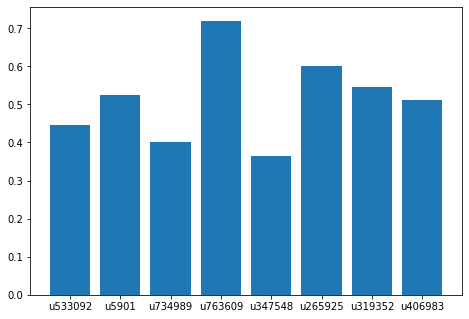

In [28]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
students = student_sr.keys()
success_rates = student_sr.values()
ax.bar(students,success_rates)
plt.show()

Question: if we take just the students with higher than 50% success rate, train the model on them, can we then generate a path that produces more than 50% from students who previously got worse success rates?